# Decision Tree - Wine Quality

<sub><sup>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. \
Modeling wine preferences by data mining from physicochemical properties. \
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.<sub><sup> 

<sub><sup>Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 \
            [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf \
            [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib<sub><sup> 



### Tehtävänanto

Selvitä, mitkä viinin ominaisuuksista näyttää aineiston perusteella vaikuttavan viinin laatuun.

1. Tutki dataa pandas-kirjaston avulla.
2. Onko aineistossa selvästi poikkeavia havaintoja?
3. Onko aineistossa duplikaatteja?
4. Visualisoi eli tee joku kuvaaja esim. histogrammi.
5. Visualisoi luokittelumuuttujaa laatua (quality) -suhteessa muihin muuttujiin. 
6. Mikä näyttäisi vaikuttavan viinin arvosanaan? 
7. Tutki dataa päätöspuumallin avulla.
8. Mitä muuta opit aineistosta visualisoinnin ja mallintamisen avulla?
9. Sopiiko päätöspuu tämän aineiston analyysiin?

### 1. Ladataan tarvittavat kirjastot ja data

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv('winequality-white_edited.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [9]:
df.info()
#Tarkistetaan, ettei datassa ole puuttuvia arvoja

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [11]:
df.dtypes
#Datan tyypit oikein - laatu vain kokonaislukuja, muut desimaalilukuja

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
df.shape

(4898, 12)

In [13]:
dups = df.duplicated()
dups.sum()

937

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(3961, 12)

Johtopäätökset: Datassa on 937 duplikaattia kokonaismäärästä 4898. Määrä on iso ja duplikaatit eivät tarjoa lisätietoa viinin laatuun vaikuttavista tekijöistä, joten ne voidaan poistaa.

### 2. Tutkitaan datan jakautumista

In [15]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000         

In [16]:
df.value_counts(df['quality'])

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

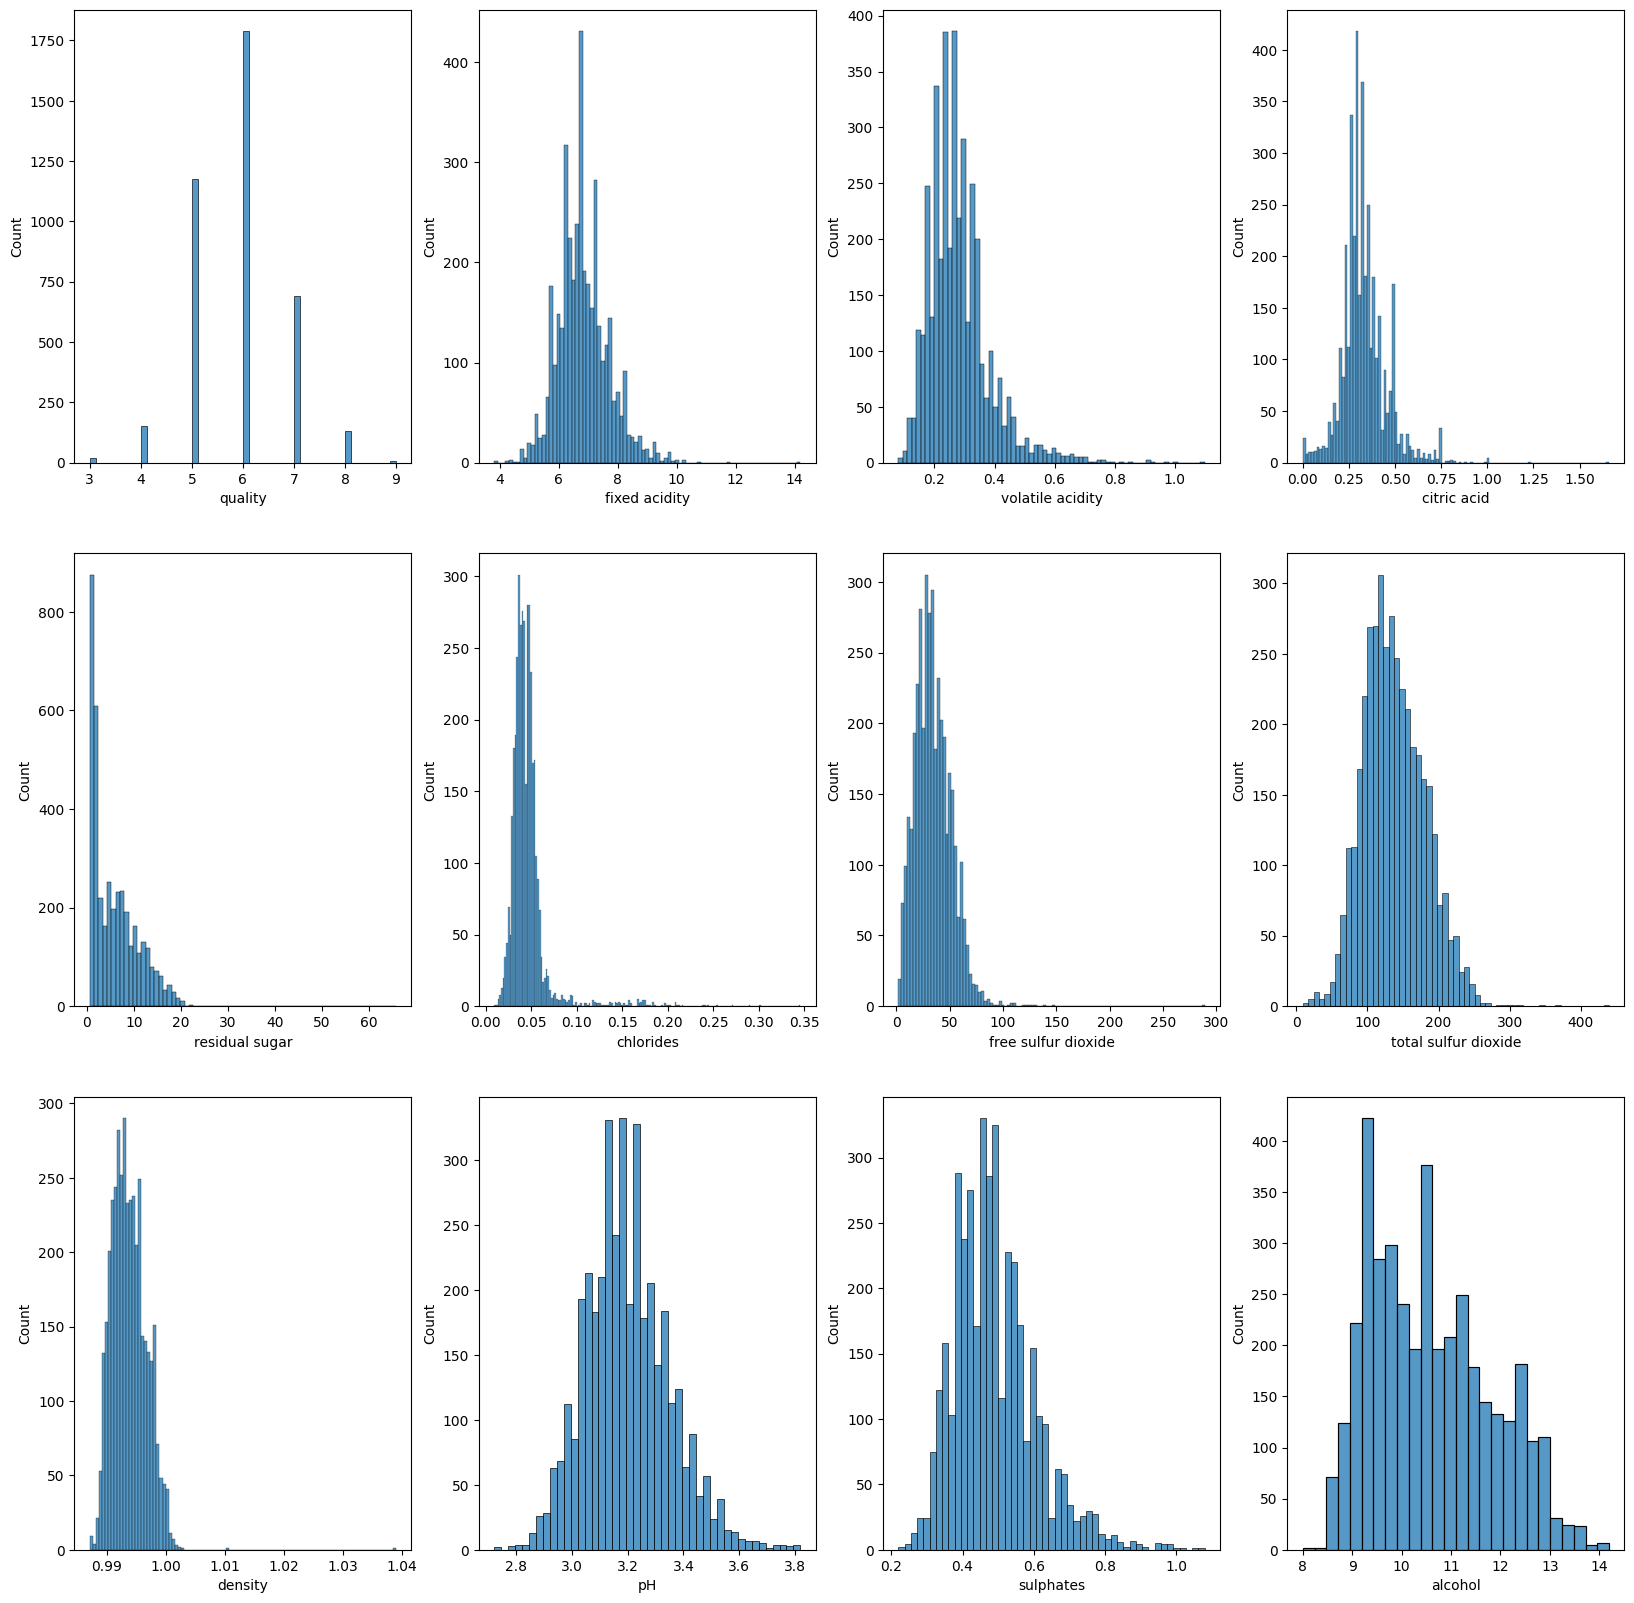

In [17]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))

sns.histplot(ax=axes[0,0], data=df['quality'])
sns.histplot(ax=axes[0,1], data=df['fixed acidity'])
sns.histplot(ax=axes[0,2], data=df['volatile acidity'])
sns.histplot(ax=axes[0,3], data=df['citric acid'])
sns.histplot(ax=axes[1,0], data=df['residual sugar'])
sns.histplot(ax=axes[1,1], data=df['chlorides'])
sns.histplot(ax=axes[1,2], data=df['free sulfur dioxide'])
sns.histplot(ax=axes[1,3], data=df['total sulfur dioxide'])
sns.histplot(ax=axes[2,0], data=df['density'])
sns.histplot(ax=axes[2,1], data=df['pH'])
sns.histplot(ax=axes[2,2], data=df['sulphates'])
sns.histplot(ax=axes[2,3], data=df['alcohol'])
plt.show

Johtopäätökset: 
- Outliereita on, mutta niiden poistaminen voi muuttaa analyysin tuloksia rajusti, sillä vielä ei tiedetä, mitkä tekijät vaikuttavat viinin laatuun. 
- Viinien laatu on normaalijakautunut ja sekä todella hyviä että todela huonoja viinejä on vähän.
- Muidenkin ominaisuuksien jakaumat ovat kohtalaisen normaalisti jakautuneita, vaikka esim. "chlorides" ja "residual sugar" -kategoriat eivät aivan noudata kaavaa.

### 3. Tutkitaan ominaisuuksien vaikutusta laatuun

<Axes: >

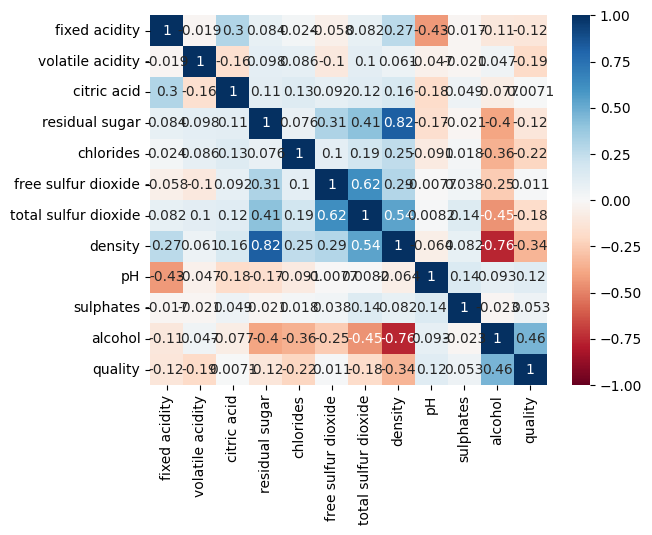

In [18]:
corrmatrix = df.corr()
sns.heatmap(corrmatrix, vmin=-1.0, vmax=1.0, cmap="RdBu", annot=True)

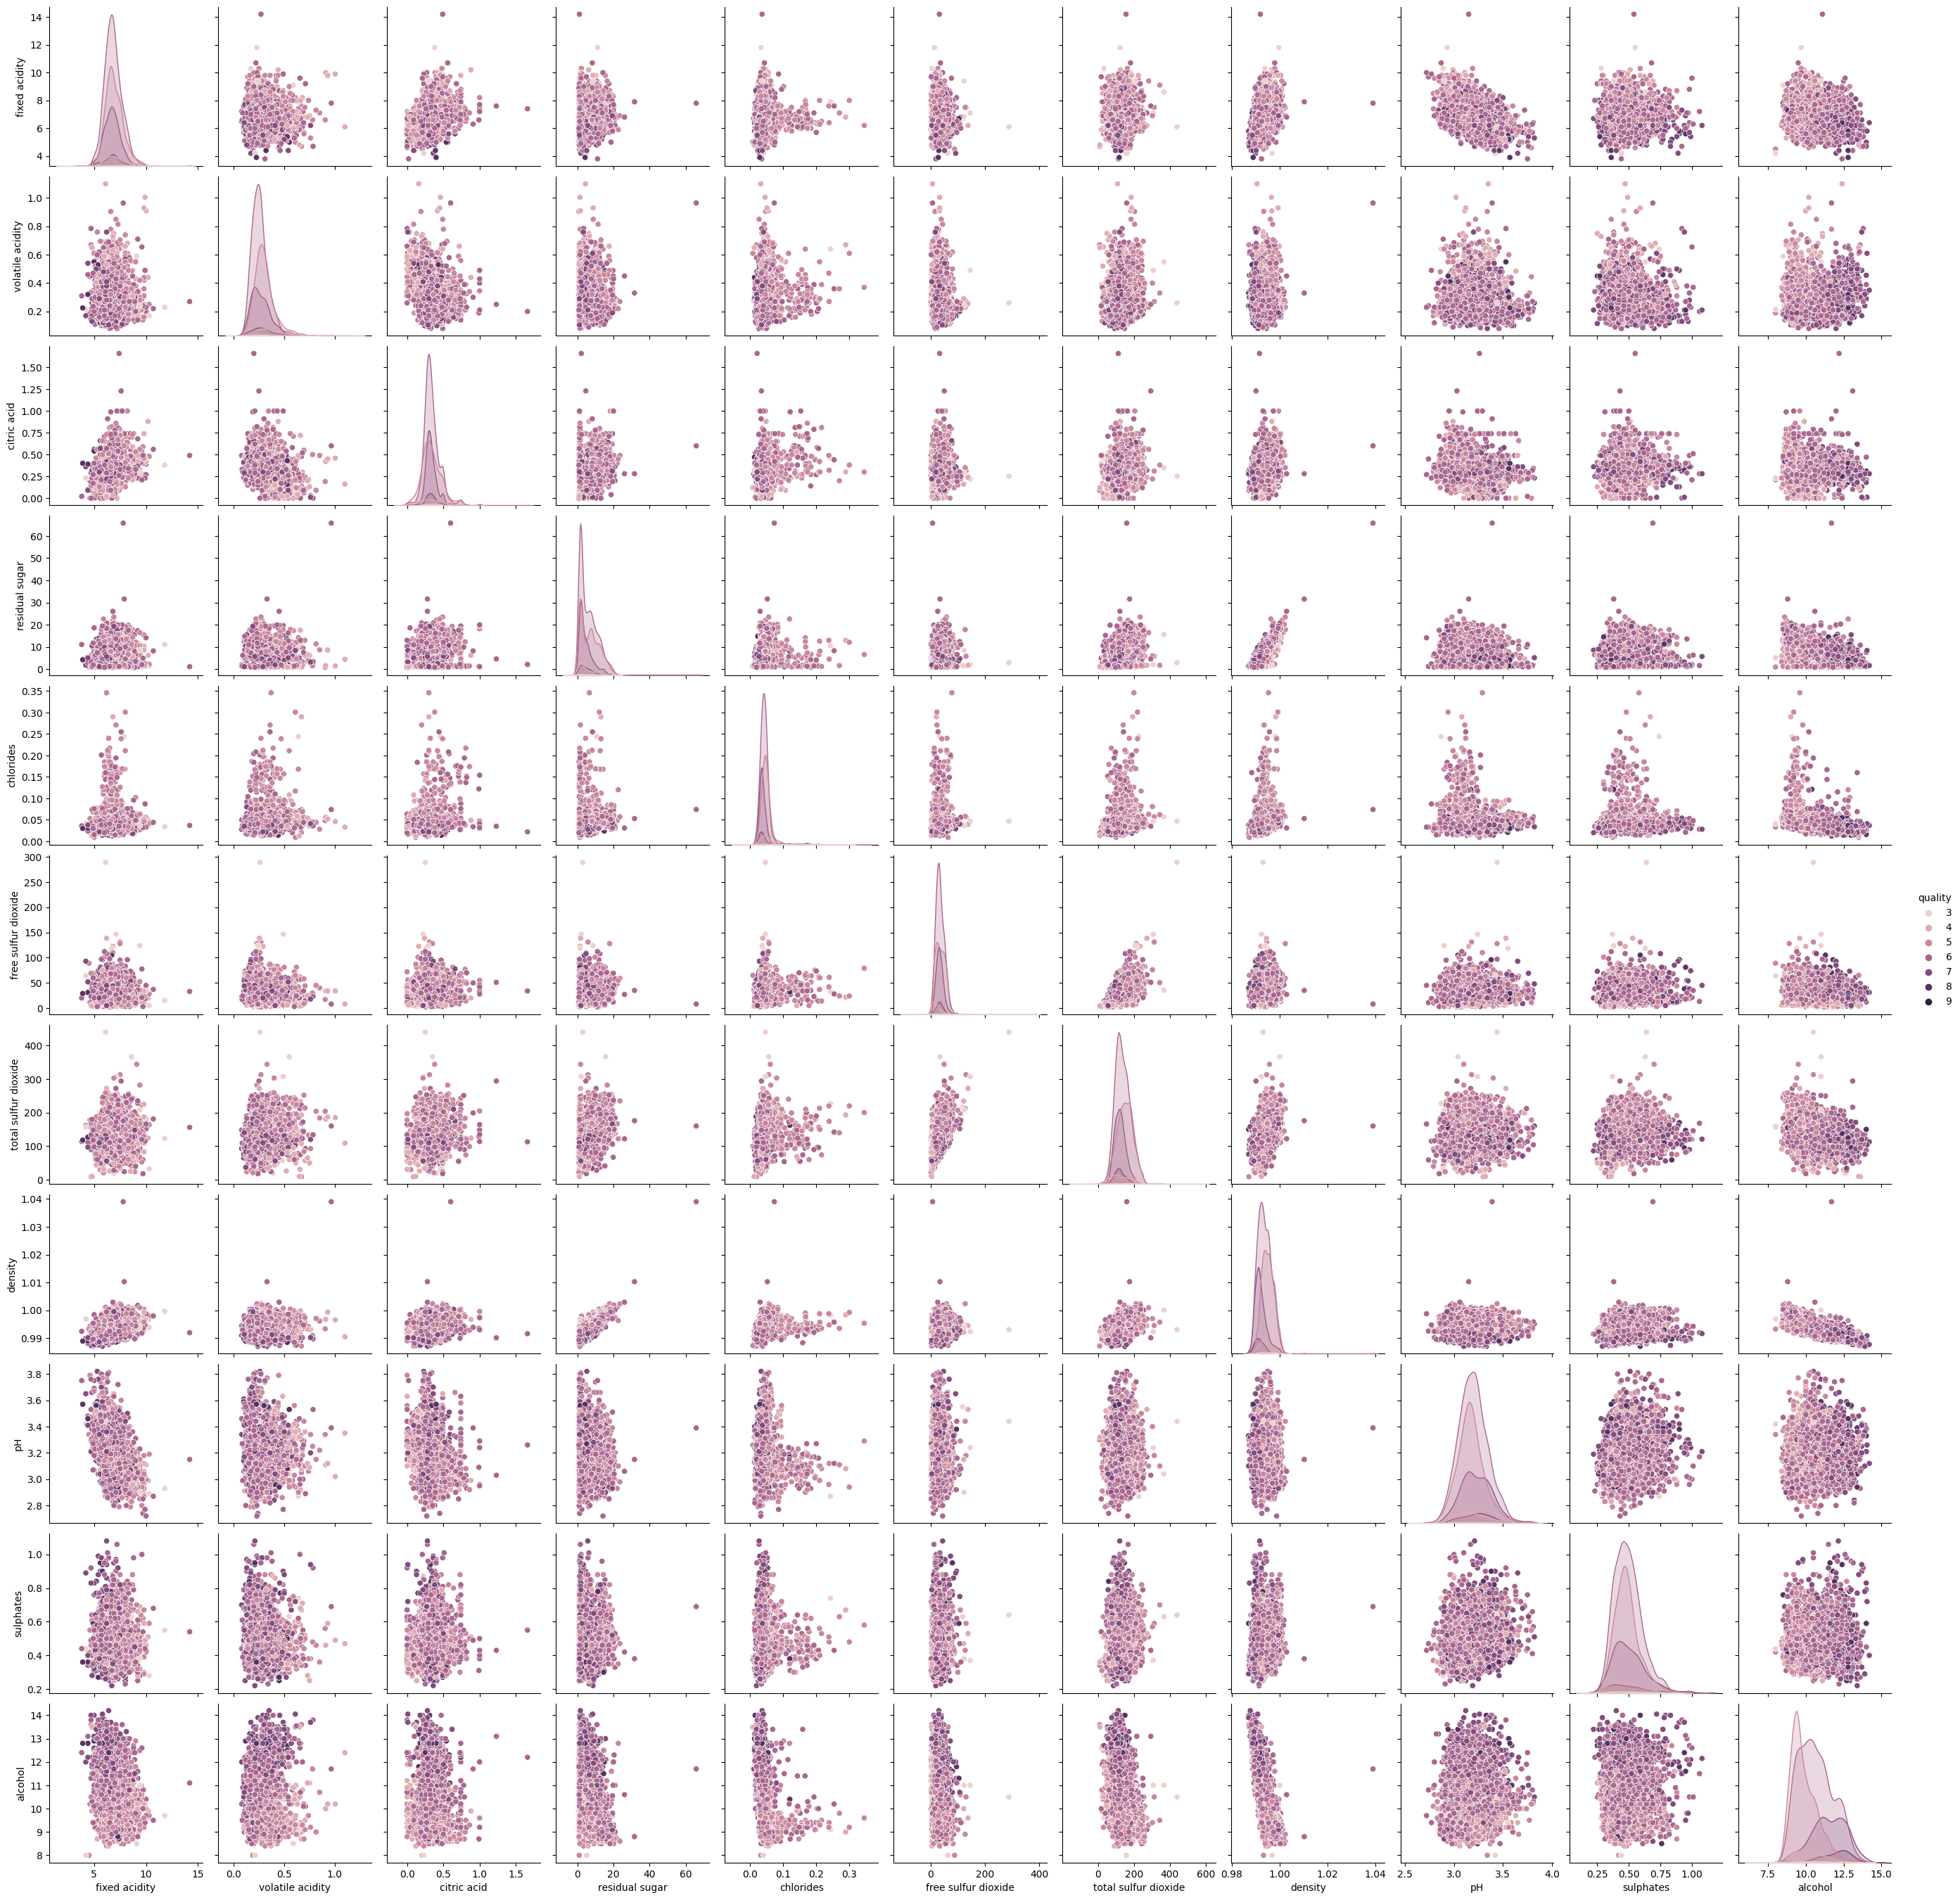

In [19]:
sns.pairplot(df, hue="quality")

Johtopäätökset: 
- Korrelaatiomatriisilla saadaan jotain käsitystä ominaisuuksien vaikutuksesta laatuun, mutta ei tarpeeksi. Vaikuttaisi, että esim. "density" vaikuttaisi negatiivisesti laatuun, muttei tiedetä, onko ominaisuudella jokin optimi, joka taas vaikuttaisi laatuun positiivisesti.
- Pairplot havainnollistaa sitä, että selkeästi poikkeavilla arvoilla voi olla vaikutusta viinin laatuun ja täten outliereiden poisto voi vääristää analyysin tulosta.
- Dataa on niin paljon, että pairplot ja sen tulkitseminen ovat sekavaa.

### 4. Tarkastellaan dataa päätöspuun avulla

In [20]:
colnames = df.columns
colnames

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
X = df.loc[:, 'fixed acidity':'alcohol']
Y_true = df.loc[:, 'quality']


In [22]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth=4)
classifier.fit(X,Y_true)

DecisionTreeClassifier(max_depth=4)

In [23]:
import graphviz
import os
from pathlib import Path

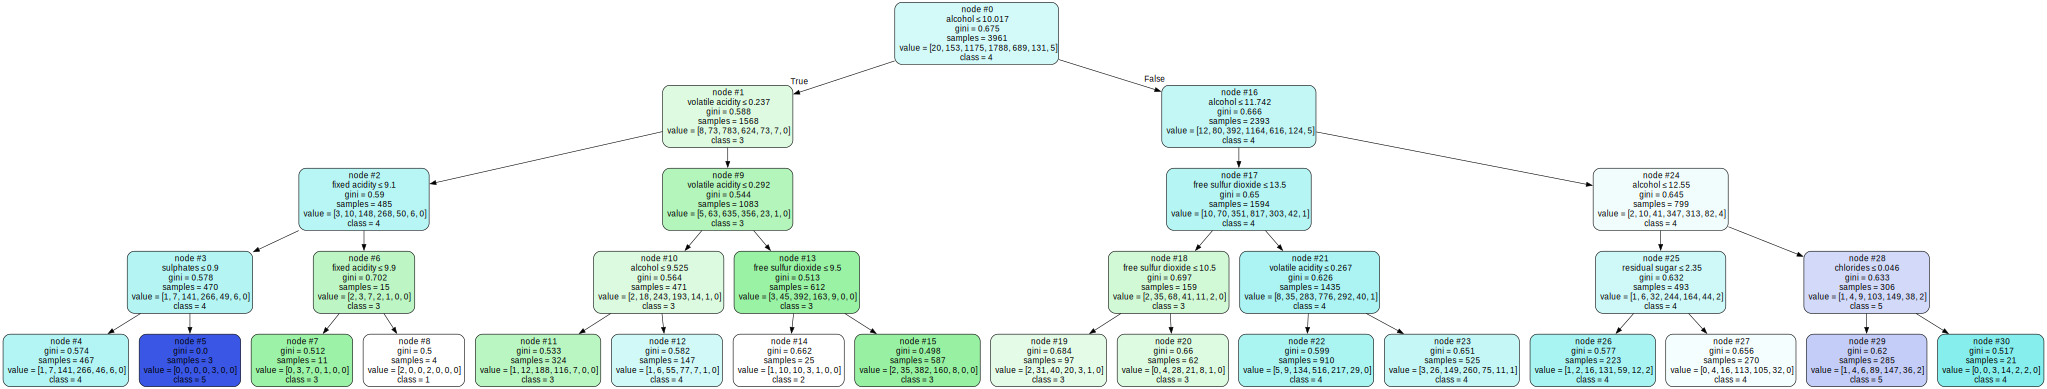

In [24]:
os.environ['PATH'] += os.pathsep +str(Path('.').resolve() / Path('Graphviz/bin'))

visu_data = tree.export_graphviz(classifier, out_file=None,
feature_names=colnames[:11],
class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
filled=True, 
node_ids=True,
#proportion=True,
rounded=True,
special_characters=True)

graph = graphviz.Source(visu_data)

graph

## 5. Arvioidaan päätöspuun tarkkuutta

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Y_pred = classifier.predict(X)


cm = confusion_matrix(Y_true, Y_pred)
print("Confusion matrix:\n",cm)

accuracy = accuracy_score(Y_true, Y_pred)
print("Accuracy calculated from the training set = %.3f" % (accuracy)) 

print(classification_report(Y_true, Y_pred))

Confusion matrix:
 [[   2    1    5   11    1    0    0]
 [   0   10   85   54    4    0    0]
 [   0   10  645  514    6    0    0]
 [   2    3  317 1377   89    0    0]
 [   0    1   27  511  150    0    0]
 [   0    0    2   93   36    0    0]
 [   0    0    0    3    2    0    0]]
Accuracy calculated from the training set = 0.551
              precision    recall  f1-score   support

           3       0.50      0.10      0.17        20
           4       0.40      0.07      0.11       153
           5       0.60      0.55      0.57      1175
           6       0.54      0.77      0.63      1788
           7       0.52      0.22      0.31       689
           8       0.00      0.00      0.00       131
           9       0.00      0.00      0.00         5

    accuracy                           0.55      3961
   macro avg       0.36      0.24      0.26      3961
weighted avg       0.53      0.55      0.51      3961



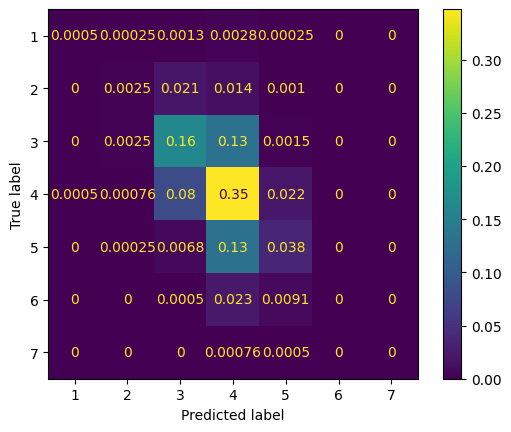

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_true, Y_pred, normalize='all')  #normalize='all'
cmd = ConfusionMatrixDisplay(cm, display_labels=['1', '2', '3', '4', '5', '6', '7'])
cmd.plot()

### Johtopäätökset:
- Päätöspuu sopii kohtalaisen hyvin datan analysointiin, mutta mallin tarkkuus on heikohko.
- Päätöspuun avulla voidaan havaita raja-arvot, jotka vaikuttavat viinin laatuun (esim. tarkka sulfaattipitoisuus) -> dataa voidaan käyttää paremmin päätöksenteon tukena.
- Kymmenen arvosanaluokkaa on hieman liikaa, joten analyysin helpottamiseksi laatuluokkia voisi yhdistää laajemmiksi kategorioiksi.